In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For getting the output plots inline
%matplotlib inline


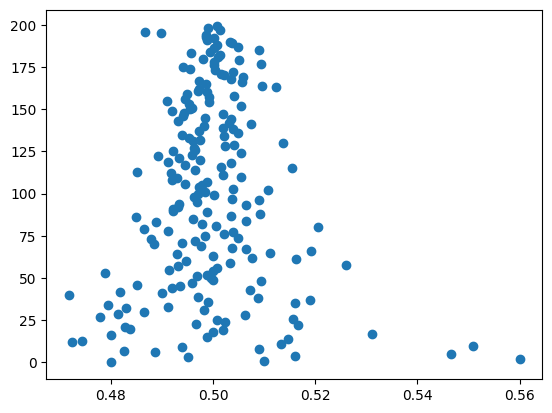

In [2]:
"""
Question 2. Probability Theory
	1. Implement a function, “coin_flip_prop”, that calculates the probability of having heads (h) using
     NumPy.random.binomial(k,π,t)=h, where k is the number of coins, π is the probability of each coin, t is 
     the number of total flips, and h is head. To confirm the coin_flip_prop function applicability, show that 
     the probability reaches 0.5 as N increases from 1 to 200 when k=1. Make a visualization. 
"""
def coin_flip_prop(N):
    all = []
    for i in range(1, N + 1):
        all.append(sum(np.random.binomial(1, 0.5, 50 * i)) / (50 * i))
    
    return all

plt.scatter(coin_flip_prop(200), range(200))

In [3]:
"""
	Question 2. Probability Theory
	2. Numerically calculate the probability of having 2 heads (h=2) when 5 coins (k=5) are flipped. 
"""

# This is for t = 50
N = 1
probablility = list(np.random.binomial(5, 0.5, 50 * N)).count(2) / (50 * N)
print("Probablility is ", probablility)

"""
General probability would be different

Total number of out comes would be 2 ** 5 = 32
HHHHH
HHHHT
HHHTT
HHTTT
HTTTT
TTTTT
.....
.....

Total number of favourable outcomes are 5

Probablility = favourable / total = 5 / 32 = 0.15625
"""

Probablility is  0.26


'\nGeneral probability would be different\n\nTotal number of out comes would be 2 ** 5 = 32\nHHHHH\nHHHHT\nHHHTT\nHHTTT\nHTTTT\nTTTTT\n.....\n.....\n\nTotal number of favourable outcomes are 5\n\nProbablility = favourable / total = 5 / 32 = 0.15625\n'

In [4]:
"""
	Question 2. Probability Theory
	3. Run the coin_flip_prop function above for N=[1,…,200]. Report the average probability. 
"""
all_probabilities = coin_flip_prop(200)
average_probablility = sum(all_probabilities) / 200
print("Average probability is ", average_probablility)

Average probability is  0.4990233453217291


In [5]:
"""
Q3. KMeans
    1. (5 pts) The data set, HW1_Q3.csv, has unlabeled data. Visualize the data set and 
    make an educated guess of what each column is. Do you find any relationship or trend 
    between columns? Explain.
"""

df = pd.read_csv("HW1_Q3.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'HW1_Q3.csv'

In [ ]:
df.isnull()


,var1,var2,var3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
114,False,False,False
115,False,False,False
116,False,False,False
117,False,False,False


In [ ]:
df.corr()
"""
From the correlations we can say that var1 and var2 are highly correlated
var3 seems like a discrete data
"""


'\nFrom the correlations we can say that var1 and var2 are highly correlated\nvar3 seems like a discrete data\n'

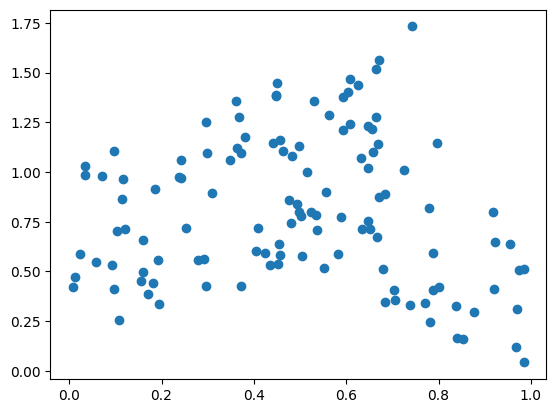

In [ ]:
# Let's visualise this data and see
plt.scatter(df['var1'], df['var2'])


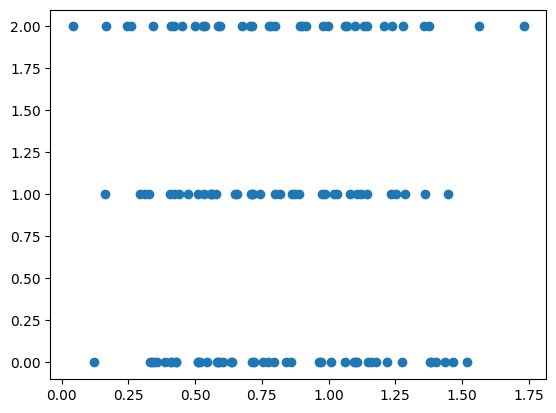

In [ ]:
plt.scatter(df['var2'], df['var3'])
# since the lines are straight or horizontal that means ther is no co-relation


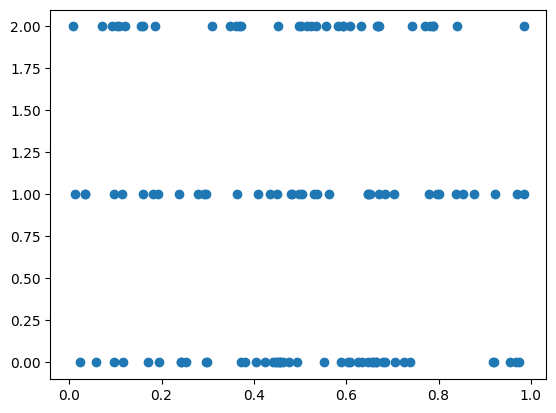

In [ ]:
plt.scatter(df['var1'], df['var3'])
# since the lines are straight or horizontal that means ther is no co-relation

"""
Description
From the above and below visualisations we can say that the var3 is not correlated with either var1 or var2
since this data has no use or effect on the dataset we can omit it in our clustering
"""


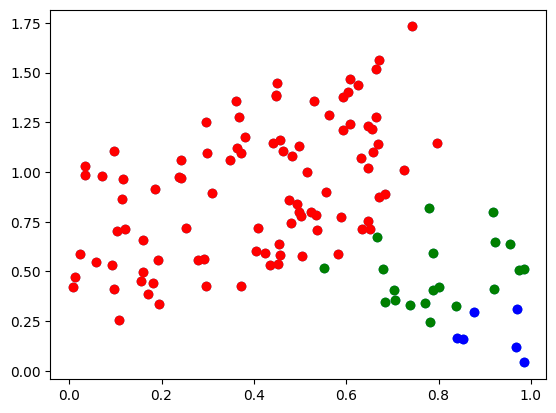

In [ ]:
"""
Q3. KMeans
2. Implement a function KMeans using NumPy to cluster the data set for k=3.    
"""


def distance_between_two_points(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt(np.square(x2 - x1) + np.square(y2 - y1))


def select_centroids(k, n):
    from random import sample

    return sample(range(n), k)

# I didn't have the time to make the colors array dynamic based on k size
colors = ['red', 'green', 'blue', 'yellow',
          'orange', 'purple', 'black', 'pink']


def my_k_means(k, n, df):
    # I am taking first, mid and last points as centroids :)
    centroids = [0] * k

    # selecting the centroids from the data points randomly, we can take any points though :)
    indexes = select_centroids(k, n)
    for i in range(k):
        centroids[i] = (df['var1'][indexes[i]], df['var2'][indexes[i]])

    current_centroid = [0] * n

    # Initialising the x & y co-ordinate lists for each cluster
    clusters = {}
    for i in range(k):
        clusters[i] = {"x": [], "y": []}

    clusters_not_formed = True

    while clusters_not_formed:
        # 1. set the centroid for the point (xi,yi)
        for i in range(n):
            distances = []
            for j in centroids:
                distances.append(
                    distance_between_two_points(
                        (df['var1'][i], df['var2'][i]), j)
                )

            cluster_index = distances.index(min(distances))
            current_centroid[i] = centroids[cluster_index]

            # Storing the x and y co-ordinates to update centroids in the future
            clusters[cluster_index]["x"].append(df['var1'][i])
            clusters[cluster_index]["y"].append(df['var2'][i])

        previous_centroids = centroids

        # 2. Update the centroids based on the mean of each cluster data points
        for i in range(len(centroids)):
            new_centroid_x = np.mean(clusters[i]["x"])
            new_centroid_y = np.mean(clusters[i]["y"])

            centroids[i] = (new_centroid_x, new_centroid_y)

        # 3. checking if centroids changed from last iteration or not
        for i in range(len(centroids)):
            previous_centroid_x, previous_centroid_y = previous_centroids[i]
            current_centroid_x, current_centroid_y = centroids[i]

            if (
                (round(previous_centroid_x, 10) == round(current_centroid_x, 10)) and
                (round(previous_centroid_y, 10) == round(current_centroid_y, 10))
            ):
                clusters_not_formed = False

    return centroids, clusters

k = 3
n = len(df)

centroids, clusters = my_k_means(k, n, df)

plt.scatter(df['var1'], df['var2'])

for i in range(k):
    x = clusters[i]['x']
    y = clusters[i]['y']
    for j in range(len(x)):
        plt.scatter(x[j], y[j], color=colors[i])


In [ ]:
"""
Q3. KMeans
3. Using myKMeans, report the centroid and covariance of each cluster. 
"""


def calculate_covariance(x, y):
    cov = 0
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    for i in range(n):
        cov += (x[i] - x_mean) * (y[i] - y_mean)

    return cov * (1 / (n - 1))

centroids, clusters = my_k_means(k, n, df)

covariances = [0] * k

for i in range(k):
    x = clusters[i]['x']
    y = clusters[i]['y']
    covariances[i] = calculate_covariance(x, y)

print('*****************************************')
print('Centroids of clusters formed are')
print(centroids)
print('*****************************************', end="\n\n")

print('*****************************************')
print('Covariances of clusters formed are')
print(covariances)
print('*****************************************')


*****************************************
Centroids of clusters formed are
[(0.8037292948275861, 0.4456546420689655), (0.5096465838888888, 1.2565115375), (0.32033867148148143, 0.695661997962963)]
*****************************************

*****************************************
Covariances of clusters formed are
[-0.007911358168357176, 0.010704947865611523, 0.014494720842385792]
*****************************************


Appropriate k value is :  8


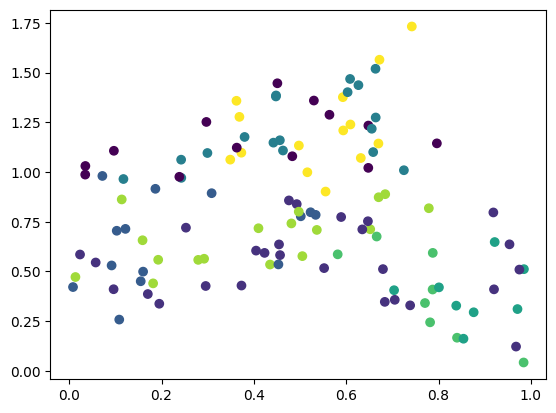

In [ ]:
"""
Q3. KMeans
4. Use sklearn.KMeans to find the appropriate k value. 
"""
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(df)
print("Appropriate k value is : ", kmeans.n_clusters)
plt.scatter(df['var1'], df['var2'], c=kmeans.labels_)


In [ ]:
"""
Q4. Exploratory Data Analysis
    1. Load two data files, d1 and d2, and merge two files using the country code. How many countries were merged? 
"""
countries = pd.read_csv('Country.csv', encoding = "ISO-8859-1")
gdp = pd.read_csv('GDP.csv', encoding = "ISO-8859-1", skiprows=3)
gdp.replace('', np.nan, inplace=True)
gdp.rename(columns={'Unnamed: 0': 'CountryCode'}, inplace=True)
a = pd.merge(countries, gdp, left_on=['CountryCode'], right_on=['CountryCode'])
print("Number of countries merged are : ", len(a))


Number of countries merged are :  224


Europe & Central Asia has the most number of countries : 57
North America has the least number of countries : 3


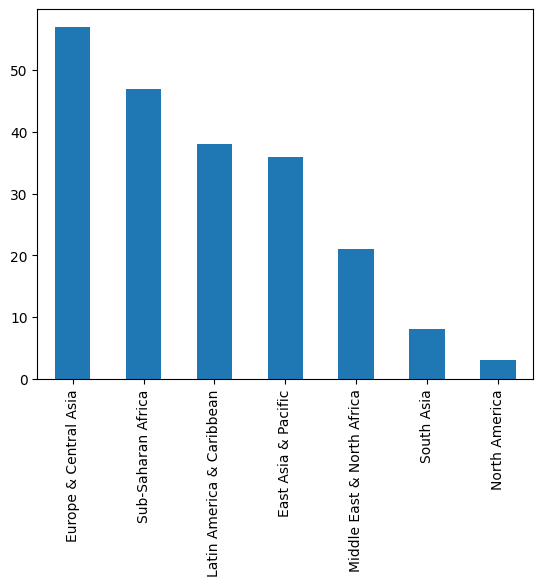

In [ ]:
"""
Q4. Exploratory Data Analysis
2. Visualize the number of countries in each region and report the region having the most and the least number of countries.
"""
regions = countries['Region'].unique()
# Removing nan
regions = regions[:-1]
fig, ax = plt.subplots()
counts = countries['Region'].value_counts()
counts.plot(ax=ax, kind='bar')

values = countries['Region'].value_counts().keys().tolist()
counts = countries['Region'].value_counts().tolist()

print('%s has the most number of countries : %s' % (values[0], counts[0]))
print('%s has the least number of countries : %s' % (values[-1], counts[-1]))

In [ ]:
"""
Question 5. Principal Component Analysis 
1.	Find the unit vector of the principal component. Then transform the data.
"""

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Given data is
x = np.array([1.23, 1.57, 1.69, 1.5, 1.83, 1.57, 1.01, 1.61, 1.02, 1.32, 1.79])
unit_vector = normalize(x[:,np.newaxis], axis=0).ravel()
print("Unit vector for the given data is : ", unit_vector)

Unit vector for the given data is :  [0.24851376 0.31720862 0.34145386 0.30306556 0.36973998 0.31720862
 0.20406414 0.32529036 0.20608458 0.26669769 0.36165823]


In [14]:
"""
Question 5. Principal Component Analysis [10 pts]
1. Find the unit vector of the principal component. Then transform the data.
"""
df = pd.read_csv("data.csv")
df.head()

,1.23,1.51
0,1.57,2.46
1,1.69,2.86
2,1.50,2.25
3,1.83,3.35
4,1.57,2.46


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df)

PCA(n_components=1)

In [30]:
x_pca = pca.transform(df)
x_pca = [x for x in x_pca.reshape(-1)]
print(x_pca)

[-0.18005714521342775, -0.597133129460776, 0.04125627712867034, -1.1057026795515377, -0.18005714521342775, 1.3643609578437053, -0.3159423444669931, 1.3421651411386288, 0.5820867751198233, -0.950976707324668]


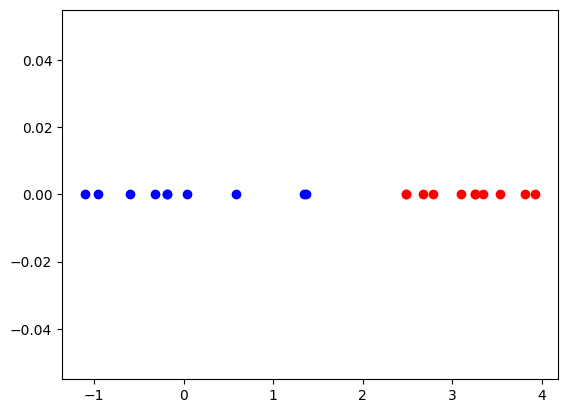

In [31]:
"""
Question 5. Principal Component Analysis [10 pts]
2.  Visualize that t is linear with respect to p.
"""

t = [2.67, 3.25, 3.53, 3.1, 3.93, 3.25, 2.48, 3.34, 2.49, 2.79, 3.81]

for i in x_pca:
    plt.scatter(i, 0, color="b")

for j in t:
    plt.scatter(j, 0, color="r")